# Introduction to Recommendation Engines
  
We’ve come to expect personalized experiences online—whether it’s Netflix recommending a show or an online retailer suggesting items you might also like to purchase. But how are these suggestions generated? In this course, you’ll learn everything you need to know to create your own recommendation engine. Through hands-on exercises, you’ll get to grips with the two most common systems, collaborative filtering and content-based filtering. Next, you’ll learn how to measure similarities like the Jaccard distance and cosine similarity, and how to evaluate the quality of recommendations on test data using the root mean square error (RMSE). By the end of this course, you’ll have built your very own movie recommendation engine and be able to apply your Python skills to create these systems for any industry.
  
What problems are recommendation engines designed to solve and what data are best suited for them? Discern what insightful recommendations can be made even with limited data, and learn how to create your own recommendations.


## Resources
  
**Notebook Syntax**
  
<span style='color:#7393B3'>NOTE:</span>  
- Denotes additional information deemed to be *contextually* important
- Colored in blue, HEX #7393B3
  
<span style='color:#E74C3C'>WARNING:</span>  
- Significant information that is *functionally* critical  
- Colored in red, HEX #E74C3C
  
---
  
**Links**
  
[NumPy Documentation](https://numpy.org/doc/stable/user/index.html#user)  
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)  
[Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
[Seaborn Documentation](https://seaborn.pydata.org)  
[Scikit-Learn Documentation](https://scikit-learn.org/stable/)  
  
---
  
**Notable Functions**
  
<table>
  <tr>
    <th>Index</th>
    <th>Operator</th>
    <th>Use</th>
  </tr>
  <tr>
    <td>1</td>
    <td>sklearn.model_selection.train_test_split</td>
    <td>Split dataset into train and test sets for machine learning.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>sklearn.metrics.mean_squared_error</td>
    <td>Calculate the mean squared error between true and predicted values.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>math.sqrt</td>
    <td>Compute the square root of a number.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>sklearn.ensemble.RandomForestRegressor</td>
    <td>Create a Random Forest Regressor model.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>sklearn.model_selection.KFold</td>
    <td>Split dataset into K consecutive folds for cross-validation.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>sklearn.ensemble.GradientBoostingRegressor</td>
    <td>Create a Gradient Boosting Regressor model.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>itertools.product</td>
    <td>Generate cartesian product of input iterables.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>sklearn.linear_model.LinearRegression</td>
    <td>Create a Linear Regression model.</td>
  </tr>
</table>
  
---
  
**Language and Library Information**  
  
Python 3.11.0  
  
Name: numpy  
Version: 1.24.3  
Summary: Fundamental package for array computing in Python  
  
Name: pandas  
Version: 2.0.3  
Summary: Powerful data structures for data analysis, time series, and statistics  
  
Name: matplotlib  
Version: 3.7.2  
Summary: Python plotting package  
  
Name: seaborn  
Version: 0.12.2  
Summary: Statistical data visualization  
  
Name: scikit-learn  
Version: 1.3.0  
Summary: A set of python modules for machine learning and data mining  
  
---
  
**Miscellaneous Notes**
  
<span style='color:#7393B3'>NOTE:</span>  
  
`python3.11 -m IPython` : Runs python3.11 interactive jupyter notebook in terminal.
  
`nohup ./relo_csv_D2S.sh > ./output/relo_csv_D2S.log &` : Runs csv data pipeline in headless log.  
  
`print(inspect.getsourcelines(test))` : Get self-defined function schema  
  
<span style='color:#7393B3'>NOTE:</span>  
  
Snippet to plot all built-in matplotlib styles :
  
```python

x = np.arange(-2, 8, .1)
y = 0.1 * x ** 3 - x ** 2 + 3 * x + 2
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)
```
  

In [1]:
import numpy as np                  # Numerical Python:         Arrays and linear algebra
import pandas as pd                 # Panel Datasets:           Dataset manipulation
import matplotlib.pyplot as plt     # MATLAB Plotting Library:  Visualizations
import seaborn as sns               # Seaborn:                  Visualizations

# Setting a standard figure size
plt.rcParams['figure.figsize'] = (8, 8)

# Setting a standard style
plt.style.use('ggplot')

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', 50)

## What are recommendation engines?
  
Whether you realize it or not, recommendations drive so many of our decisions on a daily basis. Be it obvious recommendations such as suggestions of new restaurants from friends, or a certain model of camera discussed in a blog, to less direct recommendations such as Netflix promoting shows you are likely to enjoy, or Amazon proposing other purchases that go well with what you are buying. In this course, we will focus on this second group of data-driven recommendations.
  
<center><img src='../_images/what-are-recommendation-engines.png' alt='img' width='740'></center>
  
**What kind of data do I need?**
  
Recommendation engines use the feedback of users to find new relevant items for them or for others with the assumption that users who have similar preferences in the past are likely to have similar preferences in the future like the example here. Recommendation engines benefit from having a many to many match between the users giving the feedback, and the items receiving the feedback. In other words, a better recommendation can be made for an item that has been given a lot of feedback, and more personalized recommendations can be given for a user that has given a lot of feedback.
  
<center><img src='../_images/what-are-recommendation-engines1.png' alt='img' width='740'></center>
  
**What kind of data do I need?**
  
As we see in the table here, users have rated multiple items, and each item has been rated by multiple users. This allows us to find users with similar preferences. This is valuable as users who have similar tastes in the past are likely to have similar tastes in the future.
  
<center><img src='../_images/what-are-recommendation-engines2.png' alt='img' width='740'></center>
  
**What are recommendation engines useful for?**
  
When should you use a recommendation engine? Machine learning can be used for many different kinds of predictions, from whether a stock price will increase, to detecting criminals laundering money. Recommendation engines target a specific kind of machine learning problem, they are designed to suggest a product, service, or entity to a user based on other users, and their own feedback. Let's take some examples. Making a suggestion as to what movie a user would like based on what genres of movies they have ranked highly in the past would be suited to a recommendation engine. Predicting whether that movie will do well in the box office on the other hand would be better suited to a different kind of statistical model. Predicting whether a user would enjoy a restaurant based on where they have enjoyed in the past could be performed with a recommendation engine. Predicting how much a house in the same area as the restaurant would cost based on its size and historic house prices would not.
  
<center><img src='../_images/what-are-recommendation-engines3.png' alt='img' width='740'></center>
  
**Implicit vs. explicit data**
  
Hopefully, you are beginning to see that recommendation engines rely on data that records the preferences of users. How these preferences are measured fall into two main groups, implicit and explicit. Explicit data contains direct feedback from a user as to how they feel about an item such as a numerical rating, or upvoting or downvoting. Take a dataset where users rate a restaurant out of 5 stars like Yelp, the feedback from the user is explicitly recorded. Implicit data relies not on a user's direct rating but instead uses the user's actions to summarise their preferences such as users choosing to watch certain programs, or having a specific purchase history. A user's historic choice of music on Spotify is a good example of this, based on what songs someone has listened to, you can infer what kind of music they enjoy. Here are some other examples of explicit and implicit feedback.
  
<center><img src='../_images/what-are-recommendation-engines4.png' alt='img' width='740'></center>
  
**Let's practice!**
  
Now we have covered the basics, let's check whether you have learned when recommendation engines might be used and what data is best suited to them!

### Identifying the correct data for recommendation engines
  
Sometimes whether a problem is suited to using a recommendation engine versus using a different statistical model will rely on the data available.
  
Two datasets, `restaurant_data_1` (detailing the sanitation rating a set of restaurants has received from the health inspector) and `restaurant_data_2` (containing customers' ratings of restaurants), have already been loaded for you.
  
Inspect both DataFrames in the console and select which is most applicable to a recommendation problem.
  
In this exercise and for the rest of the course, `pandas` will be loaded by default with the alias `pd`.
  
---
  
Possible answers
  
- [x] `restaurant_data_2`
- [ ] `restaurant_data_1`
- [ ] Neither `restaurant_data_1` nor `restaurant_data_2`.
- [ ] Both `restaurant_data_1` and `restaurant_data_2`.



In [7]:
# Printing heads for the question above
restaurant_data_1 = pd.read_csv('../_datasets/resturant_data_1.csv')
print(restaurant_data_1.shape)
restaurant_data_1.head()

(20, 4)


,Resturant_Name,Type,Price_Range,Health_Rating
0,Island Grill,American,$,A
1,Flavoroso,Bakery,$$$,A
2,Green Curry,Thai,$,A
3,El Pirata Porch,Mexican,$,A
4,Sweet Escape,Bakery,$$,B


In [8]:
# Printing heads for the question above
restaurant_data_2 = pd.read_csv('../_datasets/resturant_data_2.csv')
print(restaurant_data_2.shape)
restaurant_data_2.head()

(20, 5)


,Reviewer_ID,Resturant_Name,Type,Price_Range,Review (out of 5)
0,Reviewer_A,Island Grill,American,$,4.5
1,Reviewer_A,Flavoroso,Bakery,$$$,1.7
2,Reviewer_A,Green Curry,Thai,$,2.2
3,Reviewer_A,El Pirata Porch,Mexican,$,0.2
4,Reviewer_B,Island Grill,American,$,5.0


Correct! `restaurant_data_2` contains reviews that detail how customers have ranked different restaurants. This data would be great for recommending new restaurants to customers based on their tastes. What makes this particularly useful is that users have given multiple ratings, and restaurants have received ratings from many different customers.

### Implicit vs. explicit data
  
As mentioned in the video exercise, feedback used in recommendation engines can be explicit or implicit.
  
The dataset `listening_history_df` has been loaded for you. This dataset contains columns identifying the users, the songs they listen to, along with:
  
- `Skipped Track`: A Boolean column recording whether the user skipped the song or listened to it to the end.
- `Rating`: The score out of 10 the user gave the song.
  
In this exercise, you will explore the data and from this exploration identify which columns best reflect explicit feedback versus implicit feedback.
  
---
  
1. Inspect the first 5 rows of `listening_history_df`.
2. Print the number of unique values in the `Rating` and `Skipped Track` columns.
3. Display a histogram of the values in the `Rating` column
4. From the provided description and your exploration of the data, select which of its columns would be considered explicit data.
  
Possible answers
  
---
- [ ] User
- [ ] Skipped Track
- [x] Rating
- [ ] None of the columns could be used.
  
Correct! A rating is a good example of explicit data as it required the user to directly give feedback, while their dislike for a song is only implied by the action of them skipping it before it ends.

In [9]:
# Loading df
listening_history_df = pd.read_csv('../_datasets/listening_history_small.csv')
print(listening_history_df.shape)
listening_history_df.head()

(35, 4)


,User,Song Title,Skipped Track,Rating
0,User_001,Like a Rolling Stone,True,6
1,User_001,Imagine,False,2
2,User_001,What's Going On,False,9
3,User_002,Respect,False,6
4,User_003,Good Vibrations,True,0


       User            Song Title  Skipped Track  Rating
0  User_001  Like a Rolling Stone           True       6
1  User_001               Imagine          False       2
2  User_001       What's Going On          False       9
3  User_002               Respect          False       6
4  User_003       Good Vibrations           True       0
Rating           11
Skipped Track     2
dtype: int64


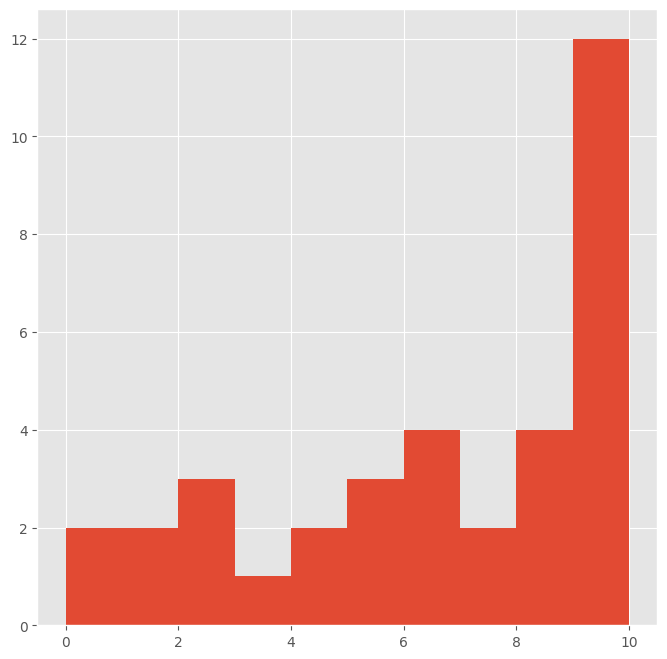

In [10]:
# Inspect the listening_history_df DataFrame
print(listening_history_df.head())

# Calculate the number of unique values
print(listening_history_df[['Rating', 'Skipped Track']].nunique())

# Display a histogram of the values in the Rating column
listening_history_df['Rating'].hist()
plt.show()

## Non-personalized recommendations
  
The first type of recommendations we will generate are called non-personalized recommendations. They are called this as they are made to all users, without taking their preferences into account.
  
**Non-personalized ratings**
  
One example is recommending the items most frequently seen together like you can see here on Amazon. This might not select the 'best' items or items that are most suited to you, but there is a good chance you will not hate them as they are so common.
  
<center><img src='../_images/non-personalized-recommendations.png' alt='img' width='740'></center>
  
**Finding the most popular items**
  
We can demonstrate how to find this with Python using this book rating DataFrame shown here. Each row corresponds to an instance of a reader completing a book with the book title stored in the book column.
  
<center><img src='../_images/non-personalized-recommendations1.png' alt='img' width='740'></center>
  
**Finding the most popular items**
  
By specifying the column of interest, "book" in this case, and using `pandas`' DataFrame `.value_counts()` method we obtain the counts of occurrences of each of the books, from highest to lowest.
  
<center><img src='../_images/non-personalized-recommendations2.png' alt='img' width='740'></center>
  
**Finding the most popular items**
  
We get just the names of the books by calling the `.index` value.
  
<center><img src='../_images/non-personalized-recommendations3.png' alt='img' width='740'></center>
  
**Finding the most liked items**
  
While this is a good start, we haven't incorporated any data about what readers thought about each book. Let's include that data here with an additional 'rating' column showing the reader's rating out of 5 for each book they read. We can use this to create alternative recommendations by finding the most highly rated books.
  
<center><img src='../_images/non-personalized-recommendations4.png' alt='img' width='740'></center>
  
**Finding the most liked items**
  
This is done by averaging the rating of each of the books and examining the highest-ranked ones. We select only the columns of interest (the title and the rating) and then specify which column we will be grouping by (the book title) We then find the mean of the groupby object using `.mean()`. This returns a DataFrame with a row per book and the average rating it receives. Unfortunately unlike `.value_counts()`, the `.groupby()` method does not automatically sort the output.
  
<center><img src='../_images/non-personalized-recommendations5.png' alt='img' width='740'></center>
  
**Finding the most liked items**
  
Therefore we will use the `.sort_values()` method, specifying that we want to sort by the ratings, in descending order (it is ascending by default). Examining the sorted DataFrame using the `.head()`, we now see the top values do indeed have very high ratings, but the books may look very unfamiliar. This is because items with very low numbers of ratings can skew the results. A book with only one rating has a solid chance of its only rating being 5 stars pushing it to the top, while a book that has been reviewed hundreds of times is likely to have at least one non-perfect review.
  
<center><img src='../_images/non-personalized-recommendations6.png' alt='img' width='740'></center>
  
**Finding the most liked items**
  
We can test our theory by seeing how many times the highest-ranked books have been reviewed. As predicted, they each occur only once in the dataset.
  
<center><img src='../_images/non-personalized-recommendations7.png' alt='img' width='740'></center>
  
**Finding the most liked popular items**
  
But by combining the initial work of counting occurrences with average ratings, we can get very useful recommendations. We can use the value_counts method once again to find the counts of occurrences and store them as book_frequency. We then cut down this Series by creating a mask of only books that have been reviewed more than one hundred times in our dataset and store as frequently_reviewed_books. Note the `.index` value is called here as we want the names of the books instead of the counts of their occurrences.
  
<center><img src='../_images/non-personalized-recommendations8.png' alt='img' width='740'></center>
  
**Finding the most liked popular items**
  
We then take a subset of our overall ratings DataFrame by selecting only the rows referring to books in frequently_reviewed_books using the `.isin()` method. This subset of reviews can now be used in the same way as earlier to find the highest rated books on average. Inspecting the result we now see that the top books no longer have full marks but are more recognizable titles.
  
<center><img src='../_images/non-personalized-recommendations9.png' alt='img' width='740'></center>
  
**Let's practice!**
  
Now let's put what we've learned to the test!

### Introduction to non-personalized recommendations
  
One of the most basic ways to make recommendations is to go with the knowledge of the crowd and recommend what is already the most popular. In this exercise, you will calculate how often each movie in the dataset has been watched and find the most frequently watched movies.
  
The DataFrame `user_ratings_df`, which is a subset of the Movie Lens dataset, has been loaded for you. This table contains identifiers for each movie and the user who watched it, along with the rating they gave it.
  
---
  
1. Calculate the number of times each movie occurs in the dataset.
2. Print the titles of the top five most frequently seen movies.